In [122]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [123]:
banknotedata = pd.read_csv(r"D:\Users\dasarred\Desktop\banknote\Banknotedata.csv",sep=',')

In [124]:
banknotedata.shape

(1372, 5)

In [125]:
type(banknotedata)

pandas.core.frame.DataFrame

In [126]:
banknotedata.head(2)

,VOWTI,SOWTI,COWTI,EOI,class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0


In [127]:
banknotedata.tail(2)

,VOWTI,SOWTI,COWTI,EOI,class
1370,-3.5637,-8.38270,12.3930,-1.2823,1
1371,-2.5419,-0.65804,2.6842,1.1952,1


In [128]:
banknotedata.columns

Index(['VOWTI', 'SOWTI', 'COWTI', 'EOI', 'class'], dtype='object')

In [129]:
banknotedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
VOWTI    1372 non-null float64
SOWTI    1372 non-null float64
COWTI    1372 non-null float64
EOI      1372 non-null float64
class    1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [130]:
banknotedata['class'].unique()

array([0, 1], dtype=int64)

In [131]:
banknotedata.describe()

,VOWTI,SOWTI,COWTI,EOI,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [132]:
bankcorr = banknotedata.corr()

In [133]:
bankcorr

,VOWTI,SOWTI,COWTI,EOI,class
VOWTI,1.000000,0.264026,-0.380850,0.276817,-0.724843
SOWTI,0.264026,1.000000,-0.786895,-0.526321,-0.444688
COWTI,-0.380850,-0.786895,1.000000,0.318841,0.155883
EOI,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


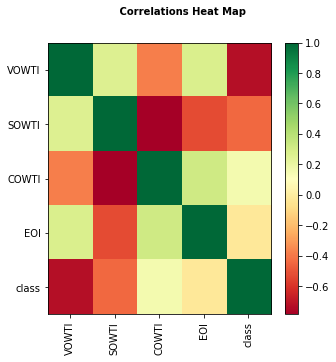

In [134]:
plt.figure(figsize=(5, 5))
plt.imshow(bankcorr, cmap='RdYlGn', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(bankcorr)), bankcorr.columns, rotation='vertical')
plt.yticks(range(len(bankcorr)), bankcorr.columns);
plt.suptitle(' Correlations Heat Map ', fontsize=10, fontweight='bold')
plt.show()

In [135]:
bankcorr['class']

VOWTI   -0.724843
SOWTI   -0.444688
COWTI    0.155883
EOI     -0.023424
class    1.000000
Name: class, dtype: float64

In [136]:
np.abs(bankcorr['class']).sort_values(ascending=False)

class    1.000000
VOWTI    0.724843
SOWTI    0.444688
COWTI    0.155883
EOI      0.023424
Name: class, dtype: float64

In [137]:
impcolumns = ['VOWTI','SOWTI','COWTI']

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [139]:
logistic = LogisticRegression()

In [140]:
 inputData = banknotedata.iloc[:,:4]
outputdata = banknotedata.iloc[:,4]

In [141]:
inputData.shape

(1372, 4)

In [142]:
inputData.columns

Index(['VOWTI', 'SOWTI', 'COWTI', 'EOI'], dtype='object')

In [143]:
outputdata.shape

(1372,)

In [144]:
logistic.fit(inputdata,outputdata)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [145]:
logistic.score(inputdata,outputdata)

0.99052478134110788

In [146]:
logistic.predict(inputdata)

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [147]:
logistic.predict(inputdata).shape

(1372,)

In [148]:
confusion_matrix(logistic.predict(inputdata),outputdata)

array([[752,   3],
       [ 10, 607]])

In [149]:
classificationReport1 = classification_report(logistic.predict(inputdata),outputdata)

In [150]:
print(classificationReport1)

             precision    recall  f1-score   support

          0       0.99      1.00      0.99       755
          1       1.00      0.98      0.99       617

avg / total       0.99      0.99      0.99      1372



In [151]:
IMPinputdata=banknotedata.iloc[:,[0,1,2] ]

In [152]:
IMPinputdata.shape

(1372, 3)

In [153]:
IMPinputdata.columns

Index(['VOWTI', 'SOWTI', 'COWTI'], dtype='object')

In [154]:
logisticIMP =LogisticRegression()

In [155]:
logisticIMP.fit(IMPinputdata,outputdata)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [156]:
logisticIMP.score(IMPinputdata,outputdata)

0.98979591836734693

In [157]:
confusion_matrix(logisticIMP.predict(IMPinputdata),outputdata)

array([[752,   4],
       [ 10, 606]])

In [158]:
classificationReport2 = classification_report(logisticIMP.predict(IMPinputdata),outputdata)

In [159]:
print(classificationReport2)

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       756
          1       0.99      0.98      0.99       616

avg / total       0.99      0.99      0.99      1372

